# Import

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown

sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', None)  

import sys, os, yaml

DATASET = "Iris"
COLAB = 'google.colab' in sys.modules

DEBUG = False
SEED = 666

ModuleNotFoundError: No module named 'yaml'

In [2]:
COLAB = 'google.colab' in sys.modules

if COLAB:
  from google.colab import drive
  if not os.path.isdir("/content/gdrive"):
    drive.mount("/content/gdrive")
    d = "/content/gdrive/MyDrive/datasets"
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
  if not os.path.isdir(ROOT): os.makedirs(ROOT)
else:
  ROOT = "./"

def makedirs(d):
  if COLAB:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  else:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d, mode=0o777, exist_ok=True)

for d in ['orig','data','output']: makedirs(d)

## Load Dataset

In [6]:
df = pd.read_csv(f"{ROOT}/orig/iris.csv")
df.head() # imprimir 5 primeiros registros


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [24]:
df.columns = [c.title().replace(' ', '_') for c in df.columns]
df.columns

Index(['Sepal_Length_(Cm)', 'Sepal_Width_(Cm)', 'Petal_Length_(Cm)',
       'Petal_Width_(Cm)', 'Target'],
      dtype='object')

## Análise Exploratória

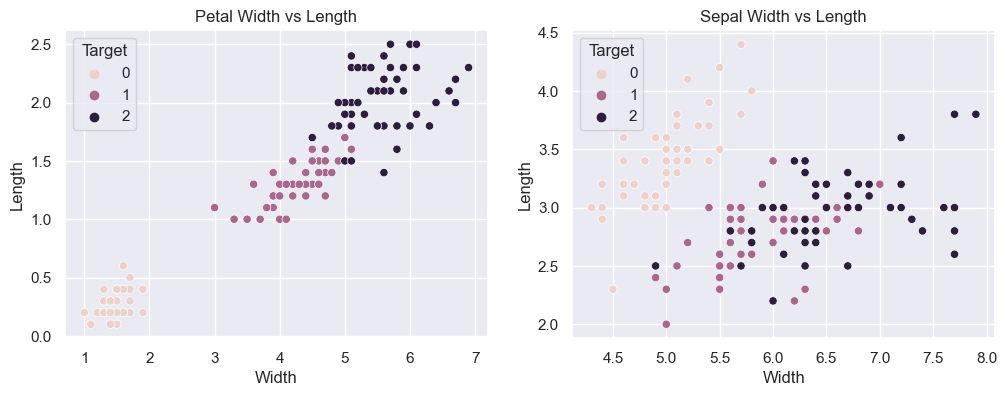

In [25]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x = "Petal_Length_(Cm)", y = "Petal_Width_(Cm)", hue = "Target")
plt.title("Petal Width vs Length")
plt.xlabel("Width")
plt.ylabel("Length")

plt.subplot(1,2,2)
sns.scatterplot(data=df, x = "Sepal_Length_(Cm)", y = "Sepal_Width_(Cm)", hue = "Target")
plt.title("Sepal Width vs Length")
plt.xlabel("Width")
plt.ylabel("Length")

plt.show()

## Save

In [26]:
df.to_pickle(f"{ROOT}/data/iris.pickle")